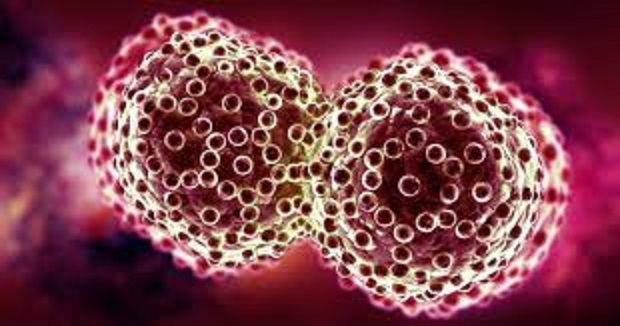

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>1 : Import neccessary libraries</h1>


In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Modeling
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

<a id="bivariate_cat"></a>
# <b><span style='color:#ED0DD9'></span><span style='color:purple'>Gene expression data</span></b>


In [64]:
data=pd.read_csv(r'F:\apply\apply\ottawa-project\problem1\TCGA-BRCA.htseq_fpkm-uq_gene_name.tsv(2)\TCGA-BRCA.htseq_fpkm-uq_gene_name.tsv',sep='\t')
df=pd.DataFrame(data)
df

,Unnamed: 0,TCGA.E2.A153.11A,TCGA.D8.A1Y3.01A,TCGA.EW.A3E8.01B,TCGA.AC.A3QQ.01B,TCGA.D8.A3Z6.01A,TCGA.AR.A1AS.01A,TCGA.BH.A1FB.11A,TCGA.E9.A228.01A,TCGA.GI.A2C8.11A,...,TCGA.B6.A0I6.01A,TCGA.A2.A25C.01A,TCGA.AC.A23H.11A,TCGA.A8.A07C.01A,TCGA.BH.A1F2.11A,TCGA.A7.A0D9.01A,TCGA.E2.A1L6.01A,TCGA.BH.A0BJ.11A,TCGA.E2.A15G.01A,TCGA.AR.A1AP.01A
0,A1BG,11.048088,10.051311,12.636355,12.867430,12.258268,11.038844,12.401935,10.535166,9.192094,...,10.683204,11.554846,11.324681,10.089860,11.321510,11.360245,12.248904,11.184023,11.931757,12.041174
1,A1CF,7.545897,0.000000,5.923047,13.316549,7.493716,0.000000,0.000000,9.275201,7.934213,...,5.642816,8.515632,7.214561,9.134636,7.221327,8.210169,7.579808,8.402787,6.476900,0.000000
2,A2M,22.133200,20.225820,20.801016,21.264817,21.181146,19.616439,21.840158,20.193821,21.771323,...,20.642959,20.905420,22.617542,20.484029,22.550405,20.869889,21.668034,22.280979,20.206194,20.998650
3,A2ML1,11.393121,11.991333,10.102736,13.751037,9.368296,10.729075,10.744769,9.348154,8.911261,...,12.652725,9.157137,12.838412,13.368502,11.351336,12.651135,9.471776,11.771207,9.028298,8.815142
4,A3GALT2,9.770488,0.000000,9.132324,0.000000,10.395511,0.000000,10.879937,8.186582,10.160243,...,13.303902,0.000000,8.439655,10.778606,10.928473,10.951270,9.220384,11.214767,10.692163,10.841050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19229,ZYG11A,13.637026,16.318499,13.997917,15.646784,14.213313,13.931586,13.758080,14.902520,8.549788,...,16.115978,13.637222,13.303714,15.053231,12.888340,14.144927,14.574600,13.518771,14.287767,15.286144
19230,ZYG11B,17.309410,16.845519,16.270049,17.277080,16.420587,16.098759,17.350927,17.306514,20.793481,...,17.077288,16.755674,17.456790,16.868465,17.828724,17.075306,17.116752,17.203698,16.915248,16.973518
19231,ZYX,20.942040,20.381695,19.963136,19.689538,20.432269,21.252044,20.577119,19.406921,19.350427,...,19.984485,19.249051,20.703871,18.716063,20.407109,20.454778,20.129015,20.553832,19.399156,20.740709
19232,ZZEF1,17.089691,15.520567,16.012432,17.384638,16.388132,15.448756,17.062263,16.115755,17.543523,...,16.435087,17.256880,16.660509,16.403926,17.153276,16.307744,16.517151,17.051081,16.856685,17.603936


<a id="bivariate_cat"></a>
# <b><span style='color:#ED0DD9'></span><span style='color:purple'> Sample information</span></b>

In [65]:
sample_info = pd.read_csv(r'F:\apply\apply\ottawa-project\problem1\TCGA-BRCA.pheno.tsv',sep='\t')
sample_info = pd.DataFrame(data1)
sample_info

,Unnamed: 0,type,tissue_source_site,disease_type
0,TCGA.BH.A1FR.11B,Normal,BH,Ductal and Lobular Neoplasms
1,TCGA.BH.A0BM.11A,Normal,BH,Ductal and Lobular Neoplasms
2,TCGA.D8.A1JH.01A,Tumor,D8,Ductal and Lobular Neoplasms
3,TCGA.BH.A0DL.11A,Normal,BH,Complex Epithelial Neoplasms
4,TCGA.E9.A1N4.11A,Normal,E9,Ductal and Lobular Neoplasms
...,...,...,...,...
117,TCGA.A7.A0CH.11A,Normal,A7,Ductal and Lobular Neoplasms
118,TCGA.A7.A0D9.01A,Tumor,A7,Ductal and Lobular Neoplasms
119,TCGA.BH.A0BA.11A,Normal,BH,Ductal and Lobular Neoplasms
120,TCGA.B6.A0X4.01A,Tumor,B6,Ductal and Lobular Neoplasms


#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'> Preprocessing</h1>

<a id="bivariate_cat"></a>
# <b><span style='color:#ED0DD9'></span><span style='color:purple'> Statistics summary of the dataframe</span></b>

In [178]:
df.describe(include='all')

,TCGA.BH.A1FR.11B,TCGA.BH.A0BM.11A,TCGA.D8.A1JH.01A,TCGA.BH.A0DL.11A,TCGA.E9.A1N4.11A,TCGA.E2.A3DX.01A,TCGA.EW.A1OY.01A,TCGA.A2.A1FV.01A,TCGA.E9.A228.01A,TCGA.BH.A1FD.01A,...,TCGA.BH.A0BJ.11A,TCGA.AN.A0FV.01A,TCGA.BH.A8FY.01A,TCGA.BH.A0AU.11A,TCGA.EW.A2FR.01A,TCGA.A7.A0CH.11A,TCGA.A7.A0D9.01A,TCGA.BH.A0BA.11A,TCGA.B6.A0X4.01A,TCGA.AC.A8OS.01A
count,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,...,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000
mean,14.203847,13.799240,14.044118,14.184248,14.091760,14.020636,13.699932,13.774586,13.759827,13.610782,...,14.014659,13.809931,13.640060,14.081010,14.048037,14.108510,13.984753,14.014163,13.463444,14.118432
std,5.401159,5.942163,5.464991,5.367220,5.377323,5.558012,5.893517,5.664151,5.713196,5.848422,...,5.617884,5.719144,5.965601,5.487460,5.468774,5.593959,5.417644,5.709277,6.100978,5.480187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.593788,12.143148,12.098380,12.498106,12.218336,12.200157,11.490895,11.650796,11.366600,11.076415,...,12.324570,11.646563,11.320693,12.424864,11.998041,12.398966,11.795699,12.575015,11.197975,12.473629
50%,16.064611,15.947803,15.974701,16.052729,15.996901,15.952386,15.684917,15.705120,15.752786,15.638703,...,16.017394,15.683139,15.719008,16.039342,15.858375,15.919261,15.795013,16.000353,15.685570,15.988973
75%,17.565637,17.587277,17.590724,17.570751,17.584182,17.588511,17.647346,17.581639,17.600874,17.607256,...,17.591228,17.609906,17.619708,17.576664,17.587775,17.631010,17.596069,17.580748,17.564358,17.581062
max,26.999253,27.517549,26.484759,27.057685,27.397623,26.312723,27.779200,28.282857,27.192293,27.163861,...,26.582644,27.530062,28.155931,26.685368,26.584774,27.716719,27.346130,26.654602,28.112011,28.141644


#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'> Missing Value Detection</h1>

In [176]:
df.isnull().sum().sum()

0

<a id="bivariate_cat"></a>
# <b><span style='color:#ED0DD9'></span><span style='color:purple'> extraction the name of features</span></b>

In [68]:
features = list(df['Unnamed: 0'])

In [69]:
sample = sample_info.to_numpy()
sample = sample.transpose()
sample_column = list(sample[0])
sample = sample[1:,]
data = pd.DataFrame(sample, columns = sample_column)

### detect intersection between samples

In [71]:
intersec_labels = [value for value in sample_column if value in df.columns.values]

### subseting data

In [73]:
df = df[intersec_labels]
data = data[intersec_labels]

In [74]:
data

,TCGA.BH.A1FR.11B,TCGA.BH.A0BM.11A,TCGA.D8.A1JH.01A,TCGA.BH.A0DL.11A,TCGA.E9.A1N4.11A,TCGA.E2.A3DX.01A,TCGA.EW.A1OY.01A,TCGA.A2.A1FV.01A,TCGA.E9.A228.01A,TCGA.BH.A1FD.01A,...,TCGA.BH.A0BJ.11A,TCGA.AN.A0FV.01A,TCGA.BH.A8FY.01A,TCGA.BH.A0AU.11A,TCGA.EW.A2FR.01A,TCGA.A7.A0CH.11A,TCGA.A7.A0D9.01A,TCGA.BH.A0BA.11A,TCGA.B6.A0X4.01A,TCGA.AC.A8OS.01A
0,Normal,Normal,Tumor,Normal,Normal,Tumor,Tumor,Tumor,Tumor,Tumor,...,Normal,Tumor,Normal,Normal,Tumor,Normal,Tumor,Normal,Tumor,Tumor
1,BH,BH,D8,BH,E9,E2,EW,A2,E9,BH,...,BH,AN,BH,BH,EW,A7,A7,BH,B6,AC
2,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Complex Epithelial Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,...,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms


In [ ]:
## replace normal with 0 and tumor with 1 

In [75]:
for i in range(0,(len(data.columns.values))):
    if data.iat[0, i] == "Tumor":
        data.iat[0, i] = 1
    else:
        data.iat[0, i] = 0

In [76]:
data

,TCGA.BH.A1FR.11B,TCGA.BH.A0BM.11A,TCGA.D8.A1JH.01A,TCGA.BH.A0DL.11A,TCGA.E9.A1N4.11A,TCGA.E2.A3DX.01A,TCGA.EW.A1OY.01A,TCGA.A2.A1FV.01A,TCGA.E9.A228.01A,TCGA.BH.A1FD.01A,...,TCGA.BH.A0BJ.11A,TCGA.AN.A0FV.01A,TCGA.BH.A8FY.01A,TCGA.BH.A0AU.11A,TCGA.EW.A2FR.01A,TCGA.A7.A0CH.11A,TCGA.A7.A0D9.01A,TCGA.BH.A0BA.11A,TCGA.B6.A0X4.01A,TCGA.AC.A8OS.01A
0,0,0,1,0,0,1,1,1,1,1,...,0,1,0,0,1,0,1,0,1,1
1,BH,BH,D8,BH,E9,E2,EW,A2,E9,BH,...,BH,AN,BH,BH,EW,A7,A7,BH,B6,AC
2,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Complex Epithelial Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,...,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms,Ductal and Lobular Neoplasms


In [115]:
X = df.to_numpy()
X = Final_df.transpose()
X = pd.DataFrame(Final_df, columns = features, index = intersec_labels)
X

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA.BH.A1FR.11B,11.646234,6.697984,22.447815,10.937734,11.500161,16.560159,9.709629,17.631595,18.307975,15.756307,...,16.022987,16.225253,15.645436,16.462417,16.550203,12.983653,17.470663,20.520456,16.774745,17.434519
TCGA.BH.A0BM.11A,10.997664,7.495724,22.164299,13.709360,0.000000,16.738883,7.932546,17.742556,16.178432,12.183309,...,15.404277,16.305593,15.325747,16.272782,16.712080,13.178742,16.996123,21.397973,16.549745,17.457662
TCGA.D8.A1JH.01A,11.692173,4.783339,21.686772,10.933063,10.283739,16.744524,9.977682,17.592890,16.154013,7.264752,...,16.389098,17.330559,15.408629,17.360146,16.589076,13.286348,17.205531,19.805952,16.951785,17.461375
TCGA.BH.A0DL.11A,12.029208,7.774146,22.783821,13.006408,9.777471,17.492939,11.487072,17.555205,15.962596,14.604550,...,15.800877,16.200353,15.246911,16.328888,16.683303,12.899932,17.354884,20.381311,17.038048,17.432391
TCGA.E9.A1N4.11A,11.400201,7.222041,21.485439,11.285991,10.122391,15.888960,9.653059,17.633430,16.562528,9.417894,...,16.267477,16.882876,15.784393,16.748220,17.101741,14.271886,17.460991,19.792130,17.317080,18.078427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.A7.A0CH.11A,11.278935,0.000000,22.423117,12.506252,10.548235,18.470910,8.758847,17.897472,17.213010,16.065981,...,15.154179,16.172698,14.391702,15.889676,16.464188,13.326680,16.752443,20.893741,16.654192,16.487037
TCGA.A7.A0D9.01A,11.360245,8.210169,20.869889,12.651135,10.951270,16.758781,11.644661,17.724932,16.540966,12.623968,...,17.898452,17.060937,15.359355,16.905508,17.123275,14.144927,17.075306,20.454778,16.307744,16.867435
TCGA.BH.A0BA.11A,11.797098,8.218294,22.359870,12.213603,10.445156,17.212737,10.068744,17.314714,16.908318,11.324332,...,15.311280,16.518748,15.513582,16.573523,16.676418,13.468628,17.595214,20.503295,17.094385,17.178661
TCGA.B6.A0X4.01A,13.133635,8.554067,19.459111,8.948144,0.000000,15.139105,9.406310,17.860178,16.911615,0.000000,...,15.682406,16.941905,15.368499,16.704312,16.640814,7.009172,16.744234,19.396059,17.084898,17.385662


<a id="bivariate_cat"></a>
# <b><span style='color:#ED0DD9'></span><span style='color:purple'>  Random Forest Feature Extraction</span></b>

In [118]:
model = RandomForestRegressor(random_state=0, max_depth=5)
model.fit(X, y.values)
importances = model.feature_importances_

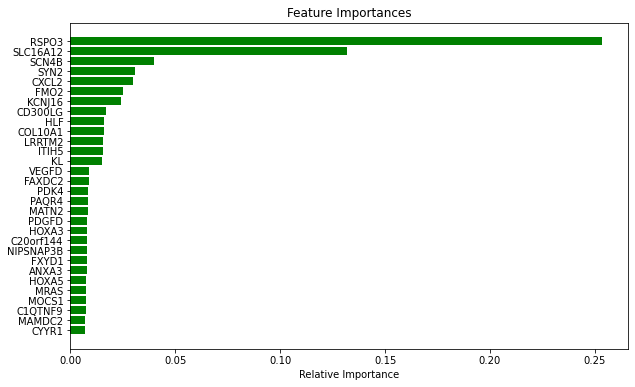

In [128]:
plt.figure(figsize=(10,6))
features = X.columns
indices = np.argsort(importances)[-30:]  # top 30 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [142]:
indices = np.argsort(importances)[-100:] # top 100 features
indices = indices[::-1]
selected_features = list()
selected_features_values =list()
for i in range(0,len(indices)):
    selected_features.append(features[indices[i]])
    selected_features_values.append(importances[indices[i]])
selected_features_values
selected_features_RF = pd.DataFrame(data=selected_features_values, columns=["correlation"], index=selected_features)
selected_features_RF

,correlation
RSPO3,0.253368
SLC16A12,0.131738
SCN4B,0.039957
SYN2,0.030692
CXCL2,0.029764
...,...
ADAMTS6,0.001239
ARSK,0.001235
RPL21,0.001232
EPHB2,0.001230


<a id="bivariate_cat"></a>
# <b><span style='color:#ED0DD9'></span><span style='color:purple'> Pearson Correlation</span></b>

In [129]:
df_p = X
df_p['output'] = list(y)
cor = df_p.corr()

### Correlation with output variable

In [130]:
cor_target = abs(cor["output"])
#Selecting highly correlated features
features_sorted = cor_target.sort_values(ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False)
selected_features = features_sorted.iloc[1:101]

In [131]:
heatmap = features_sorted.iloc[0:20]
cor_data = cor
cor_data = cor_data[heatmap.index.values]
cor_data = cor_data.transpose()
cor_data = cor_data[heatmap.index.values]
cor_data

,output,PAMR1,ITPRIPL1,ADAMTS5,VEGFD,CYYR1,RSPO3,CAVIN2,GIPC2,MMP11
output,1.000000,-0.756035,-0.744234,-0.738804,-0.736660,-0.735995,-0.733088,-0.730057,-0.729919,0.729611
PAMR1,-0.756035,1.000000,0.832055,0.812039,0.862747,0.811485,0.782233,0.857325,0.823777,-0.758414
ITPRIPL1,-0.744234,0.832055,1.000000,0.814255,0.862397,0.882575,0.852875,0.830303,0.853790,-0.785650
ADAMTS5,-0.738804,0.812039,0.814255,1.000000,0.828958,0.828180,0.807953,0.837604,0.862476,-0.693478
VEGFD,-0.736660,0.862747,0.862397,0.828958,1.000000,0.857633,0.871297,0.933062,0.913682,-0.794742
CYYR1,-0.735995,0.811485,0.882575,0.828180,0.857633,1.000000,0.835093,0.872760,0.906743,-0.777453
RSPO3,-0.733088,0.782233,0.852875,0.807953,0.871297,0.835093,1.000000,0.873214,0.892926,-0.697703
CAVIN2,-0.730057,0.857325,0.830303,0.837604,0.933062,0.872760,0.873214,1.000000,0.924613,-0.773629
GIPC2,-0.729919,0.823777,0.853790,0.862476,0.913682,0.906743,0.892926,0.924613,1.000000,-0.720944
MMP11,0.729611,-0.758414,-0.785650,-0.693478,-0.794742,-0.777453,-0.697703,-0.773629,-0.720944,1.000000


<a id="bivariate_cat"></a>
# <b><span style='color:#ED0DD9'></span><span style='color:purple'> Heatmap</span></b> 

C:\Users\Win10\AppData\Local\Temp\ipykernel_9608\3685749381.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cor_data, dtype=np.bool))


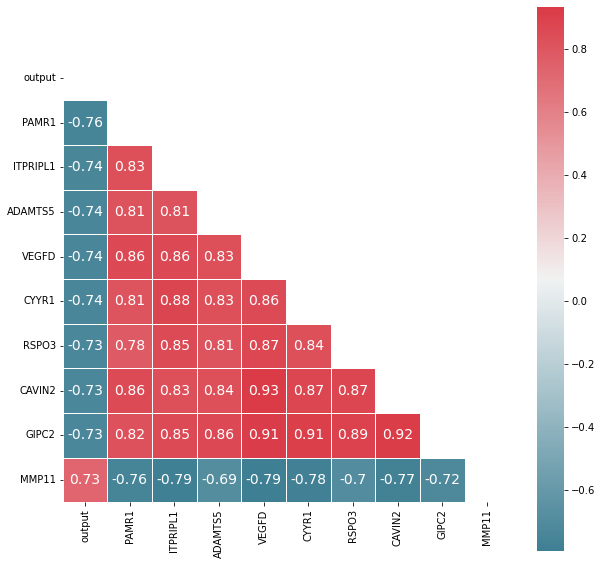

In [138]:
# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(10, 10)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(cor_data, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(cor_data, cmap=cmap, mask=mask, square=True, linewidths=.5, 
            annot=True, annot_kws={'size':14})

# displays the plot
plt.show()

In [139]:
# save features
feature_out = cor["output"]
selected_features.to_csv('feature_result_MaralKarbaschi.csv')

## Remove the most correlated features

In [140]:
upper = cor_data.where(np.triu(np.ones(cor_data.shape),k=1).astype(bool))
upper.abs()
upper

,output,PAMR1,ITPRIPL1,ADAMTS5,VEGFD,CYYR1,RSPO3,CAVIN2,GIPC2,MMP11
output,NaN,-0.756035,-0.744234,-0.738804,-0.736660,-0.735995,-0.733088,-0.730057,-0.729919,0.729611
PAMR1,NaN,NaN,0.832055,0.812039,0.862747,0.811485,0.782233,0.857325,0.823777,-0.758414
ITPRIPL1,NaN,NaN,NaN,0.814255,0.862397,0.882575,0.852875,0.830303,0.853790,-0.785650
ADAMTS5,NaN,NaN,NaN,NaN,0.828958,0.828180,0.807953,0.837604,0.862476,-0.693478
VEGFD,NaN,NaN,NaN,NaN,NaN,0.857633,0.871297,0.933062,0.913682,-0.794742
CYYR1,NaN,NaN,NaN,NaN,NaN,NaN,0.835093,0.872760,0.906743,-0.777453
RSPO3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.873214,0.892926,-0.697703
CAVIN2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.924613,-0.773629
GIPC2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.720944
MMP11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
drop_features =  [column for column in upper.columns if any(upper[column] > 0.60)]
drop_features

['ITPRIPL1', 'ADAMTS5', 'VEGFD', 'CYYR1', 'RSPO3', 'CAVIN2', 'GIPC2', 'MMP11']

In [143]:
selected_features_RF = selected_features_RF.iloc[0:50]
X = X[X.columns.intersection(list(selected_features_RF.index.values[0:50]))]
X

,ACMSD,ANXA3,C1QTNF9,C20orf144,CD300LG,CDK12,COL10A1,CSF1,CXCL2,CYP2D7,...,SH3RF2,SLC16A12,SYN2,TCF21,TIPARP,TMEM114,TPRG1,VEGFD,WIPF3,ZNF750
TCGA.BH.A1FR.11B,12.277474,17.730075,14.781771,10.245594,17.868522,16.846140,13.969731,18.642249,18.966173,13.093277,...,15.749563,12.823936,14.688836,10.221963,17.697937,9.444703,14.636844,18.131182,15.471152,15.769192
TCGA.BH.A0BM.11A,12.081204,19.251021,12.415745,8.467212,17.188667,16.523266,11.463499,18.406854,17.648037,12.382496,...,15.771806,13.466489,14.945026,8.889982,18.044843,0.000000,15.143659,15.372799,16.252680,16.806988
TCGA.D8.A1JH.01A,14.597989,17.178545,10.980390,11.705828,13.181835,17.339769,20.597525,17.935624,14.485375,11.210063,...,14.066927,15.144149,12.294449,5.832812,17.714392,8.492596,17.080921,13.116092,14.504149,15.447420
TCGA.BH.A0DL.11A,12.068257,18.173033,14.712441,10.843283,18.268725,17.002955,11.649610,18.979284,19.148980,12.217575,...,15.965488,12.705258,15.385936,10.286570,17.346374,0.000000,14.547926,17.877216,15.208163,15.763653
TCGA.E9.A1N4.11A,11.484084,18.551387,13.756894,10.674077,16.244019,17.472000,10.470786,18.778360,18.953187,12.810670,...,15.580308,14.281338,14.781727,8.294250,18.838479,0.000000,17.256030,16.492584,15.618166,17.052490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.A7.A0CH.11A,13.102564,16.707925,15.888245,10.293164,18.625419,16.268657,12.692628,19.039976,17.683372,12.211414,...,15.376768,13.383512,16.062130,9.854884,17.979080,0.000000,15.950748,18.713331,14.557058,15.294858
TCGA.A7.A0D9.01A,11.884563,16.704256,9.327954,12.231637,13.930803,16.796576,19.478811,16.434347,12.661642,12.529735,...,11.588853,9.711553,12.324973,8.065593,16.758262,0.000000,14.641862,14.014590,12.536888,16.622158
TCGA.BH.A0BA.11A,11.874103,17.579377,14.100655,10.926570,18.087468,16.998719,14.169435,18.874430,16.798867,10.301747,...,15.513334,14.157686,15.747281,11.613132,18.966971,0.000000,14.996327,18.822479,14.956838,16.284799
TCGA.B6.A0X4.01A,15.242960,14.735997,8.312617,12.400382,0.000000,16.674621,15.491474,17.900170,12.891901,12.222651,...,12.898103,8.544063,10.423584,0.000000,16.358618,9.725577,20.336362,8.127566,14.286523,14.958258


In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>1: K-mean</h1>

<a id="bivariate_cat"></a>
# </span><span style='color:purple'> Elbow Method</span></b>

---
The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:

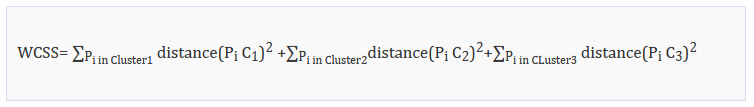

---

In [153]:
kmeans_set = {"init":"random","n_init":10,"max_iter":300,"random_state":1}

In [156]:
List = []
for k in range(1,7):
    kmeans = KMeans(n_clusters = k, **kmeans_set)  # ** open dictionay
    kmeans.fit(scaled_features)
    List.append(kmeans.inertia_)

C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [159]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,7),List,curve="convex",direction="decreasing")
k1.elbow

2

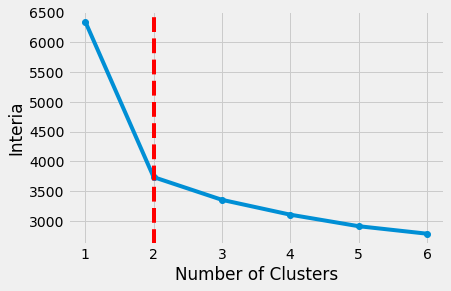

In [160]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,7),List,'-o')
plt.xticks(range(1,7))
plt.xlabel("Number of Clusters")
plt.ylabel("Interia")
plt.axvline(x=k1.elbow,color="r",label="axvline-full height",ls="--")
plt.show()

* Based on the elbow method, the optimal number of clusters for kmeans algorithm is equal to 4.

In [162]:
X = X[X.columns.intersection(list(selected_features_RF.index.values[0:50]))]
KM = KMeans(n_clusters=2, random_state=0, n_init=1000).fit(X)

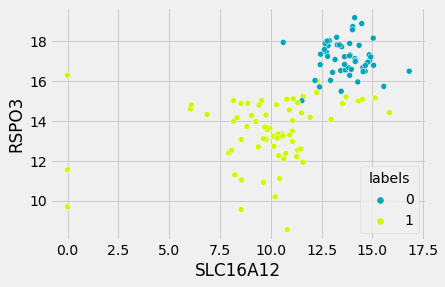

<Figure size 1080x1080 with 0 Axes>

In [163]:
scaled_features['labels'] = list(KM.labels_)
sns.scatterplot(data=scaled_features, y=selected_features_RF.index.values[0], x=selected_features_RF.index.values[1] , hue="labels",palette='nipy_spectral')
plt.figure(figsize=(15,15))
plt.show()

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>2: SpectralClustering</h1>

---------
In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex, or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster, such as when clusters are nested circles on the 2D plane.

--------

In [165]:
clustering = SpectralClustering(n_clusters = 2, assign_labels = 'discretize', random_state=0).fit(X)

In [166]:
X['labels'] = clustering.labels_

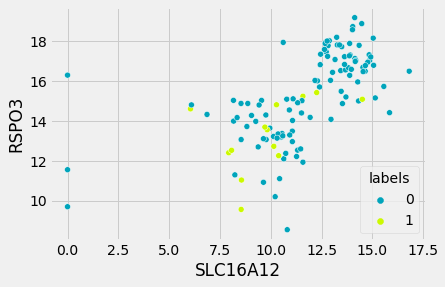

<Figure size 432x288 with 0 Axes>

In [167]:
sns.scatterplot(data=X, y=selected_features_RF.index.values[0], x=selected_features_RF.index.values[1], hue='labels',palette='nipy_spectral')
plt.figure()
plt.show()

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>  3: MiniBatchKMeans</h1>

---
The __`MiniBatchKMeans`__ is a variant of the __`KMeans`__ algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

The algorithm iterates between two major steps, similar to vanilla k-means. In the first step, b samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. In the second step, the centroids are updated. In contrast to k-means, this is done on a per-sample basis. For each sample in the mini-batch, the assigned centroid is updated by taking the streaming average of the sample and all previous samples assigned to that centroid. This has the effect of decreasing the rate of change for a centroid over time. These steps are performed until convergence or a predetermined number of iterations is reached.

MiniBatchKMeans converges faster than KMeans, but the quality of the results is reduced. In practice this difference in quality can be quite small, as shown in the example and cited reference.

C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\User

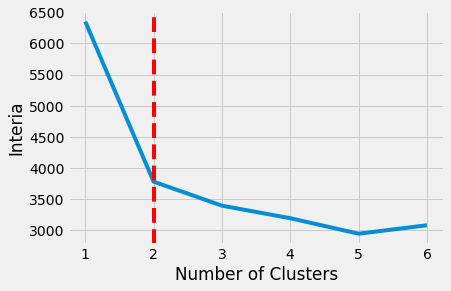

In [169]:
from sklearn.cluster import MiniBatchKMeans
List = []
for k in range(1,7):#this range is optional
    minibatch = MiniBatchKMeans(n_clusters=k , random_state =42, batch_size=50) 
    minibatch.fit(scaled_features)
    List.append(minibatch.inertia_)

kl = KneeLocator(range(1,7), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,7),List)
plt.xticks(range(1,7))
plt.xlabel("Number of Clusters")
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='r', label='axvline - full height', ls='--')
plt.show()    

In [170]:
minibatch = MiniBatchKMeans(n_clusters=2, random_state =42, batch_size=50)
minibatch.fit(scaled_features)

C:\Users\Win10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(batch_size=50, n_clusters=2, random_state=42)

In [173]:
X['labels'] = minibatch.labels_

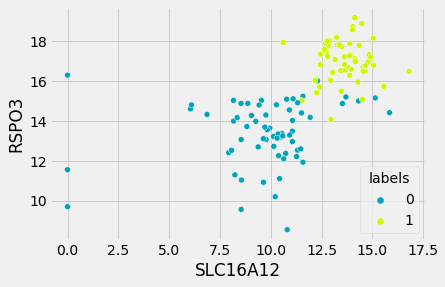

<Figure size 432x288 with 0 Axes>

In [174]:
sns.scatterplot(data=X, y=selected_features_RF.index.values[0], x=selected_features_RF.index.values[1], hue='labels',palette='nipy_spectral')
plt.figure()
plt.show()

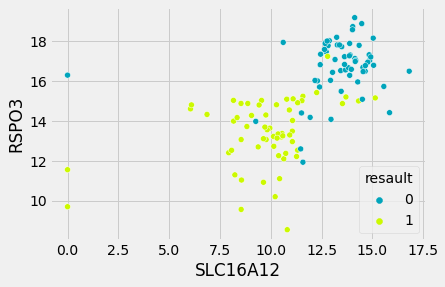

<Figure size 1080x1080 with 0 Axes>

In [168]:
X = X[X.columns.intersection(list(selected_features_RF.index.values[0:50]))]
X['resault'] = y.values
sns.scatterplot(data=X, y=selected_features_RF.index.values[0], x=selected_features_RF.index.values[1] , hue="resault",palette='nipy_spectral')
plt.figure(figsize=(15,15))
plt.show()

--- 

### We choose between the three models, and k-mean has a great model.
- [x] KMeans Clustering
- [ ] SpectralClustering
- [ ] MiniBatchKMeans Clustering

---

<h2 align="left"><font color='purple'>Thank you for your time and consideration!😊</font></h2>